# **Networks PSET - Sample Solutions**

## Importing relevant packages

In [1]:
## Plotting tools
%matplotlib inline
from bokeh.io import output_notebook, show, export_png, output_file
output_notebook()
from bokeh.plotting import figure
from bokeh.layouts import gridplot, column, row
from bokeh.models import Div
from bokeh.models import LinearAxis, Range1d
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Import data processing packages
import pandas as pd
import numpy as np

#Import network packages
import networkx as nx

# Install pygraphviz
#!apt-get install graphviz graphviz-dev
#!pip install pygraphviz 

Loading BokehJS ...

### Part (a) *Preliminary Analysis*

We first attempt to build a network for each of the phases using the adjacency matrices given. The *networkx* package is used to load and save the networks in the section below 

In [2]:
# Download save and compute Phase Data

"""
Adjacency matrices are saved as variables phase1, phase2, phase3 etc.
Their corresponding Graphs/Networks are saved as G1, G2, G3 etc.

"""
phases = {}
G = {}
G_summaries = {'Nodes': [], 'Edges': []}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  G_summaries['Nodes'].append(G[i].number_of_nodes())
  G_summaries['Edges'].append(G[i].number_of_edges())

**Question 1**

In [3]:
pd.DataFrame(G_summaries, range(1, 12))

,Nodes,Edges
1,15,18
2,24,28
3,33,56
4,33,48
5,32,39
6,27,47
7,36,49
8,42,58
9,34,44
10,42,50


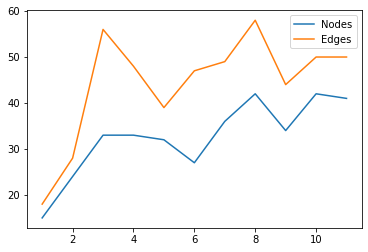

In [4]:
plt.plot(range(1,12), [ G[i].number_of_nodes() for i in range(1,12) ], label="Nodes")
plt.plot(range(1,12), [ G[i].number_of_edges() for i in range(1,12) ], label="Edges")
plt.legend()
plt.show()

**Question 2**

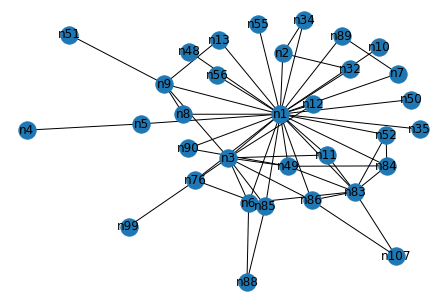

In [5]:
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)  

This corresponds to choice (d)

# Part (b) *Centrality Measures*

We now compute *degree centrality*, *betweenness centrality* and *eigenvector centrality* for the 21 actors across all phases 

In [6]:
"""
Degree Centrality are saved in variables deg[1], deg[2], deg[3] etc. (corresponding to each phase)
Betweenness Centrality are saved in variables bet[1], bet[2], bet[3] etc. (corresponding to each phase)
Eigenvector Centrality are saved in variables eig[1], eig[2], eig[3] etc. (corresponding to each phase)

"""
def compute_metric(metric_fn):
  return { i: metric_fn(G[i]) for i in range(1,12) }

deg = compute_metric(nx.degree_centrality) ## networkx already calculates normalized value
bet = compute_metric(lambda g: nx.betweenness_centrality(g, normalized = True)) ## the betweenness values are normalized by 2/((n-1)(n-2)) for graphs, and 1/((n-1)(n-2)) for directed graphs where n is the number of nodes in G.
eig = compute_metric(nx.eigenvector_centrality) ## normalized value returned

print("Timing computation of degree centrality.")
%timeit -n 10000 compute_metric(nx.degree_centrality)
print("Timing computation of betweenness centrality.") 
%timeit -n 100 compute_metric(lambda g: nx.betweenness_centrality(g, normalized = True)) 
print("Timing computation of eigenvector centrality.")
%timeit -n 100 compute_metric(nx.eigenvector_centrality) 

#deg_df = pd.DataFrame(deg, index = np.arange(1,12))
#bet_df = pd.DataFrame(bet, index = np.arange(1,12))
#eig_df = pd.DataFrame(eig, index = np.arange(1,12))

deg_df = pd.DataFrame.from_dict(deg, orient='index')
bet_df = pd.DataFrame.from_dict(bet, orient='index')
eig_df = pd.DataFrame.from_dict(eig, orient='index')

Timing computation of degree centrality.
100 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Timing computation of betweenness centrality.
20.8 ms ± 58.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Timing computation of eigenvector centrality.
12.6 ms ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Question 1**

In [7]:
deg_df

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,...,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
1,0.857143,0.071429,0.142857,0.142857,0.142857,0.071429,0.285714,0.214286,0.071429,0.071429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.826087,NaN,0.130435,0.086957,0.130435,0.043478,0.130435,0.086957,0.043478,0.043478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.843750,0.031250,0.062500,0.250000,0.281250,0.062500,0.062500,0.125000,0.062500,0.093750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.718750,0.031250,0.187500,0.218750,0.218750,0.031250,0.062500,0.156250,0.062500,0.031250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.709677,0.032258,0.096774,0.064516,0.161290,0.064516,0.032258,0.096774,NaN,0.032258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.692308,0.038462,NaN,0.076923,0.538462,0.115385,NaN,0.192308,NaN,0.076923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.685714,0.028571,NaN,0.085714,0.285714,0.028571,0.057143,0.114286,NaN,0.057143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.487805,0.024390,NaN,0.024390,0.317073,NaN,NaN,0.073171,NaN,0.097561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.303030,NaN,0.030303,0.030303,0.333333,NaN,0.030303,0.090909,0.030303,0.030303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.317073,0.024390,NaN,0.048780,0.024390,NaN,NaN,0.073171,NaN,NaN,...,0.02439,0.02439,0.02439,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question 2**

In [8]:
bet_df

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,...,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
1,0.906593,0.0,0.142857,0.036630,0.000000,0.0000,0.053114,0.036630,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.942688,NaN,0.123847,0.086957,0.001976,0.0000,0.083004,0.003294,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.829503,0.0,0.000000,0.046573,0.095497,0.0625,0.000672,0.029973,0.0,0.001008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.839310,0.0,0.196213,0.079589,0.090438,0.0000,0.000000,0.016537,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.883871,0.0,0.064516,0.064516,0.044086,0.0000,0.000000,0.064516,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.542564,0.0,NaN,0.000000,0.227179,0.0000,NaN,0.010256,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.589356,0.0,NaN,0.000000,0.073389,0.0000,0.000000,0.031653,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.553659,0.0,NaN,0.000000,0.314634,NaN,NaN,0.000000,NaN,0.055285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.249053,NaN,0.000000,0.000000,0.576231,NaN,0.000000,0.060606,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.342683,0.0,NaN,0.035366,0.000000,NaN,NaN,0.001829,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question 3**

In [9]:
eig_df

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,...,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
1,0.626451,0.160482,0.171753,2.193098e-01,0.253842,0.160482,0.364437,0.312670,0.160482,0.160482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.673912,NaN,0.169109,1.522634e-01,0.239088,0.145195,0.176940,0.072783,0.145195,0.145195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.593879,0.014355,0.107798,2.774973e-01,0.291305,0.093443,0.053605,0.162067,0.126237,0.125180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.610379,0.105740,0.162857,2.710145e-01,0.272630,0.105740,0.149337,0.251661,0.152970,0.105740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.640199,0.122096,0.156787,1.267042e-01,0.275675,0.150869,0.034570,0.181265,NaN,0.122096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.496656,0.077633,NaN,1.487375e-01,0.454884,0.182481,NaN,0.247009,NaN,0.148738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.601987,0.102625,NaN,2.002621e-01,0.372468,0.102625,0.097483,0.199359,NaN,0.166122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.544131,0.092745,NaN,9.274522e-02,0.433007,NaN,NaN,0.200771,NaN,0.190180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.458958,NaN,0.093587,9.178102e-02,0.467988,NaN,0.038614,0.193090,0.093587,0.093587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.508022,0.103890,NaN,1.084247e-01,0.103890,NaN,NaN,0.161136,NaN,NaN,...,0.075557,0.000005,0.10389,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question 4**

Empirically, we saw that the degree centrality was the fastest to calculate. This makes sense, as it is O(n^2) whereas betweenness and eigenvector centralities are O(n^3)

**Question 5**

We can now proceed to calculate the mean and variance for every column of the dataframes. Note that our values are already normalized, based on *networkx* conventions. We first replace all the null values with 0, for the inactive phases of all players. This essentially helps make the data comparable across and players and basically weighs players who are inactive in more phases as potentially less "important". We also calculate other statistics such as standard deviation, variance and a player's activity to help understand our data.

In [10]:
## Replacing null values with 0 , i.e. attaching 0 centrality for inactive phases for all actors
deg_df = deg_df.fillna(0.)
bet_df = bet_df.fillna(0)
eig_df = eig_df.fillna(0)

deg_statistics = pd.DataFrame([deg_df.mean(), deg_df.std(), deg_df.var(), deg_df.astype(bool).sum(axis=0)], index=['Mean', 'Std. dev', 'Variance','Activity'])
deg_statistics = deg_statistics.T.reset_index()

bet_statistics = pd.DataFrame([bet_df.mean(), bet_df.std(), bet_df.var(), deg_df.astype(bool).sum(axis=0)], index=['Mean', 'Std. dev', 'Variance','Activity'])
bet_statistics = bet_statistics.T.reset_index()

eig_statistics = pd.DataFrame([eig_df.mean(), eig_df.std(), eig_df.var(), deg_df.astype(bool).sum(axis=0)], index=['Mean', 'Std. dev', 'Variance','Activity'])
eig_statistics = eig_statistics.T.reset_index()

We now identify the 3 players with highest and lowest mean centrality for each of these metrics

In [11]:
print("Highest Mean Centrality : ")
print(" Degree - ")
print(deg_statistics.sort_values(by=['Mean'], ascending = False).head(6))
print("Betweenness - ")
print(bet_statistics.sort_values(by=['Mean'], ascending = False).head(6))
print("Eigenvector - ")
print(eig_statistics.sort_values(by=['Mean'], ascending = False).head(6))
print("\n\nLowest Mean Centrality : ")
print("Degree - ")
print(deg_statistics.sort_values(by=['Mean'], ascending = True).head(3))
print("Betweenness - ")
print(bet_statistics.sort_values(by=['Mean'], ascending = True).head(3))
print("Eigenvector - ")
print(eig_statistics.sort_values(by=['Mean'], ascending = True).head(3))

Highest Mean Centrality : 
 Degree - 
   index      Mean  Std. dev  Variance  Activity
0     n1  0.601485  0.240848  0.058008      11.0
4     n3  0.223505  0.150110  0.022533      11.0
25   n12  0.170893  0.125645  0.015787      10.0
7    n85  0.118010  0.049330  0.002433      11.0
22   n76  0.112235  0.073632  0.005422      10.0
3    n83  0.095836  0.076965  0.005924      11.0
Betweenness - 
   index      Mean  Std. dev  Variance  Activity
0     n1  0.655051  0.238535  0.056899      11.0
25   n12  0.167562  0.187327  0.035092      10.0
4     n3  0.129403  0.179745  0.032308      11.0
22   n76  0.083791  0.099159  0.009833      10.0
54   n87  0.061327  0.092958  0.008641       6.0
84   n41  0.050369  0.167055  0.027907       3.0
Eigenvector - 
   index      Mean  Std. dev  Variance  Activity
0     n1  0.546391  0.117044  0.013699      11.0
4     n3  0.298095  0.124629  0.015533      11.0
7    n85  0.190612  0.065860  0.004338      11.0
22   n76  0.165877  0.080282  0.006445      10.0
3

# Part (c)

*Include your answer to this question in your written report.*

# Part (d)

*Include your answer to this question in your written report.*

# Part (e)

*Include your answer to this question in your written report.*

# Part (f)

We can now attempt to analyze the evolution of the network and correlate the patterns we observe to events that happened during the investigation.

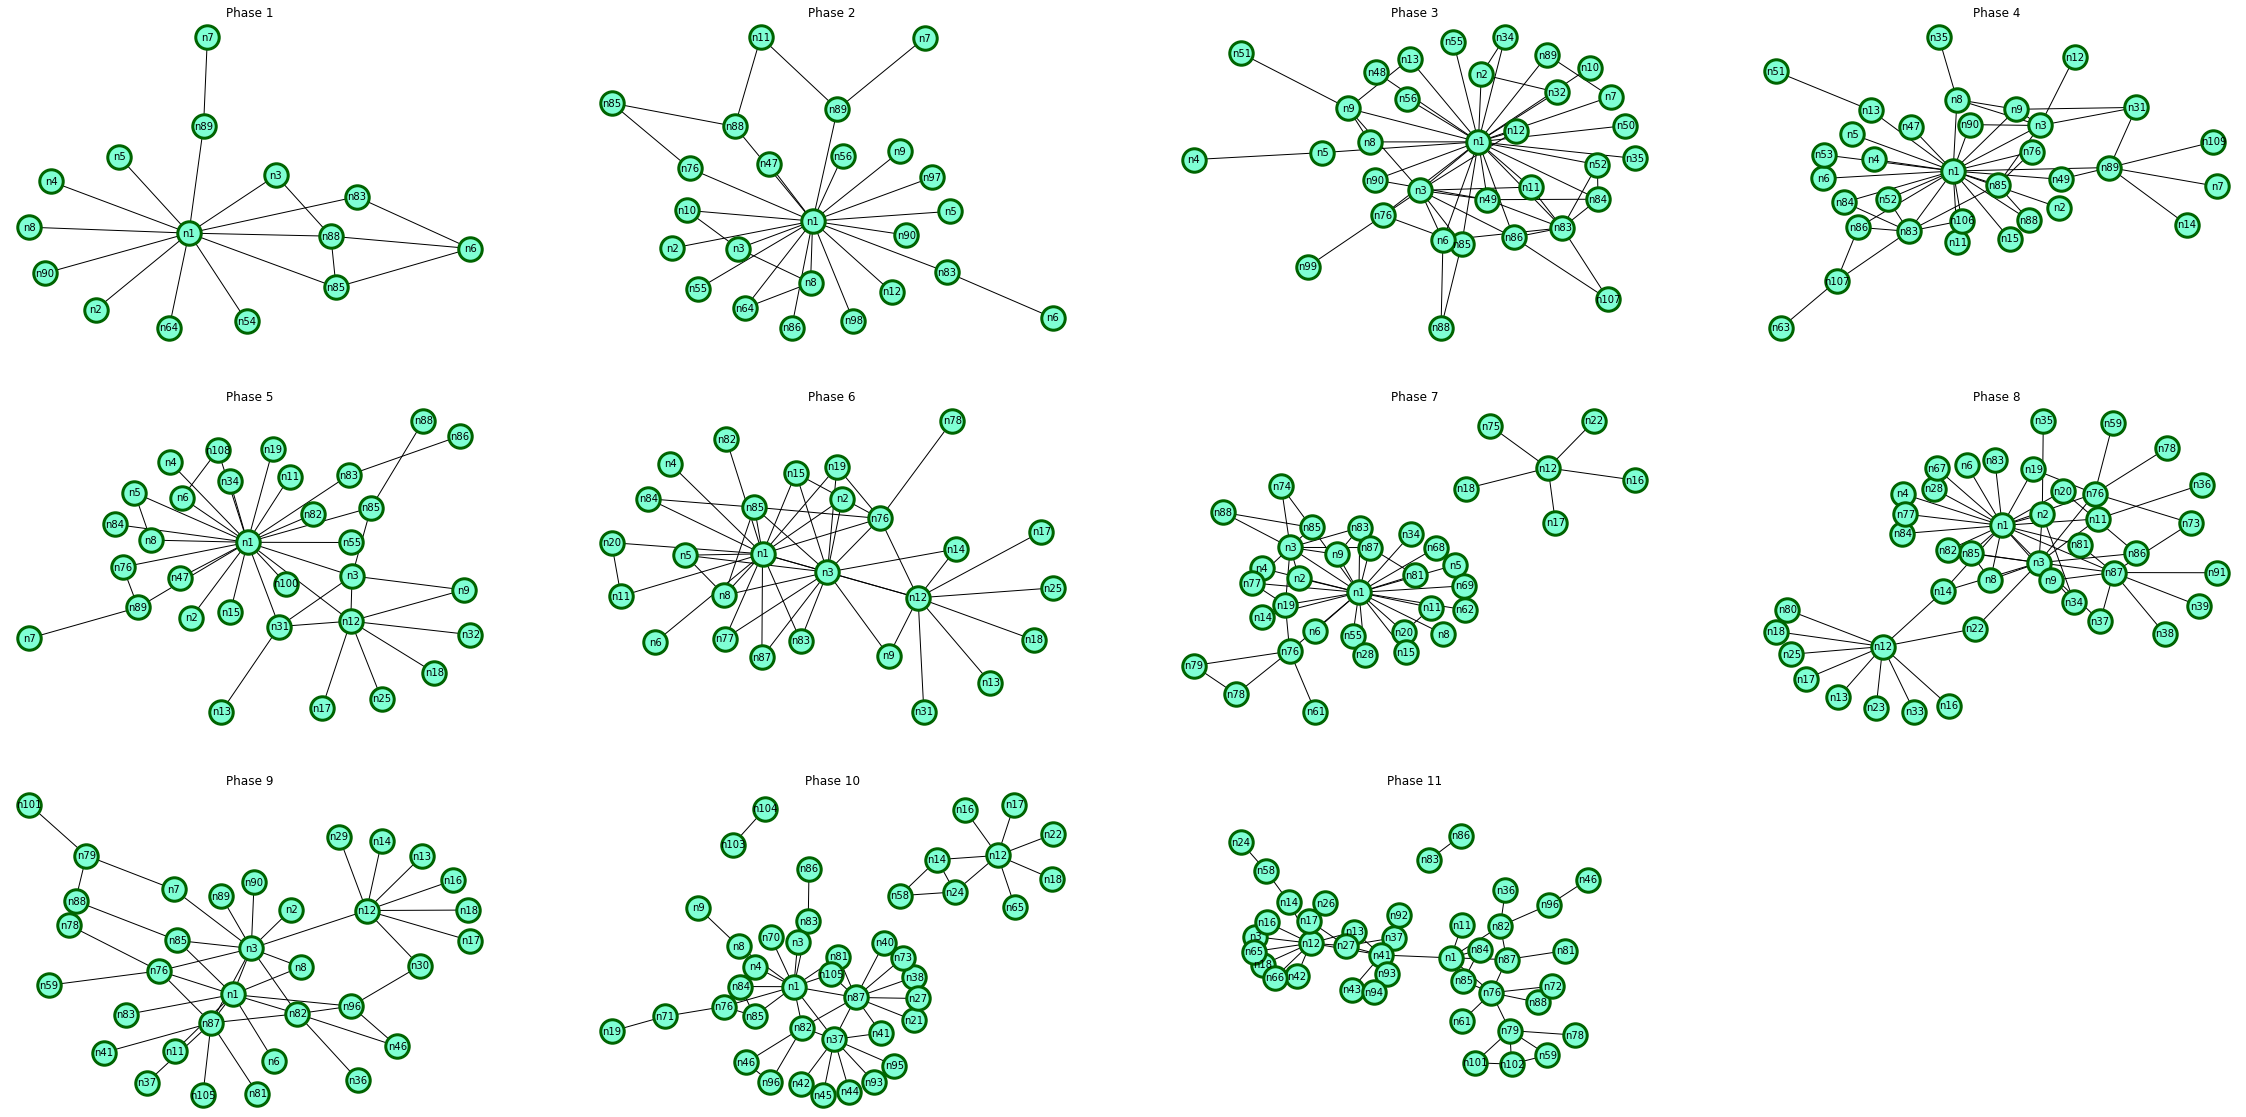

In [12]:
# Visualizing the evolution of the network across all phases
options = {
    "font_size": 10,
    "node_size": 550,
    "node_color": "aquamarine",
    "edgecolors": "darkgreen",
    "linewidths": 3}

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))
ax = axes.flatten()
for i, sub_ax in zip(range(1,12), ax):
  nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), **options, with_labels=True, ax = sub_ax)
  sub_ax.set_axis_off()
  sub_ax.set_title('Phase {}'.format(i))
ax[10].margins(0.20)
fig.delaxes(ax[11])

From this we see that X=4

**Question 2**

*Include your answer to this question in your written report.*

# Part (g)

*Include your answer to this question in your written report.*

# Part (h)

*Include your answer to this question in your written report.*

# Part (i)

*Include your answer to this question in your written report.*

# Part (j)

*Include your answer to this question in your written report.*